In [5]:
import numpy as np
import matplotlib.pyplot as plt
from prob2utils import train_model, get_err
from helper import parse
import pandas as pd
from surprise import SVD, evaluate, accuracy, Reader, Dataset

In [6]:
# Train model

reader = Reader()
Y_train = Dataset.load_from_file('data/data.txt', reader)
Y_train  = Y_train.build_full_trainset()
algo = SVD(n_factors=25, n_epochs=300, biased=True, lr_all = 0.01, reg_all = 0.1)
algo.fit(Y_train)

# algo.qi is V matrix 
V = algo.qi.transpose()

# Project to 2 dimensions
A = np.linalg.svd(V)[0]
V_proj = np.dot(A[:, :2].transpose(), V)

# Rescale dimensions
V_proj /= V_proj.std(axis=1).reshape(2, 1)

(25, 1682)


In [15]:
# Find vectors num_ratings and avg_ratings

data = np.loadtxt('data/data.txt').astype(int)
N = max(data[:,1]).astype(int) # movies
num_ratings = np.zeros(N)
tot_ratings = np.zeros(N)

for row in data:
    j = row[1] - 1
    y = row[2]
    num_ratings[j] += 1
    tot_ratings[j] += y
    
avg_ratings = tot_ratings / num_ratings

In [23]:
def make_plot(idx, title):
    ''' Takes in indicies of movies to annotate and plots'''
    plt.figure(figsize=(15, 12))
    plt.scatter(V_proj[0], V_proj[1], s=num_ratings, c=avg_ratings, cmap=plt.get_cmap('RdYlGn'), alpha=0.6)
    plt.colorbar().set_label("Average rating")
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    for movie_id, title in movies[['Movie Id', 'Movie Title']].values[idx]:
        x, y = V_proj[0][movie_id-1], V_proj[1][movie_id-1]
        plt.annotate(title, xy=(x, y), horizontalalignment='center', verticalalignment='center', fontsize=8, rotation=0, arrowprops=dict(arrowstyle='-', lw=1, alpha=0.5))
    plt.show()

In [29]:
# Plot visualizations

movie_features = ["Movie Id", "Movie Title", "Unknown", "Action", "Adventure", "Animation", "Childrens", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", 
         "Thriller", "War", "Western"]
movies = pd.read_csv('data/movies.txt', delimiter='\t', header=None, encoding='latin1', names=movie_features)

# Movies to annotate
chosen_idx = np.array([0, 21, 167, 707, 762, 749, 687, 1013, 1090, 1414])

popular_idx = np.argsort(num_ratings)[-10:]
best_idx = np.argsort(avg_ratings)[-10:]

genre_dict = parse('data/movies.txt')
comedy_ids = genre_dict['Comedy']
horror_ids = genre_dict['Horror']
scifi_ids = genre_dict['Sci-Fi']
comedy_idx = np.random.choice(comedy_ids, 10) - 1
horror_idx = np.random.choice(horror_ids, 10) - 1
scifi_idx = np.random.choice(scifi_ids, 10) - 1

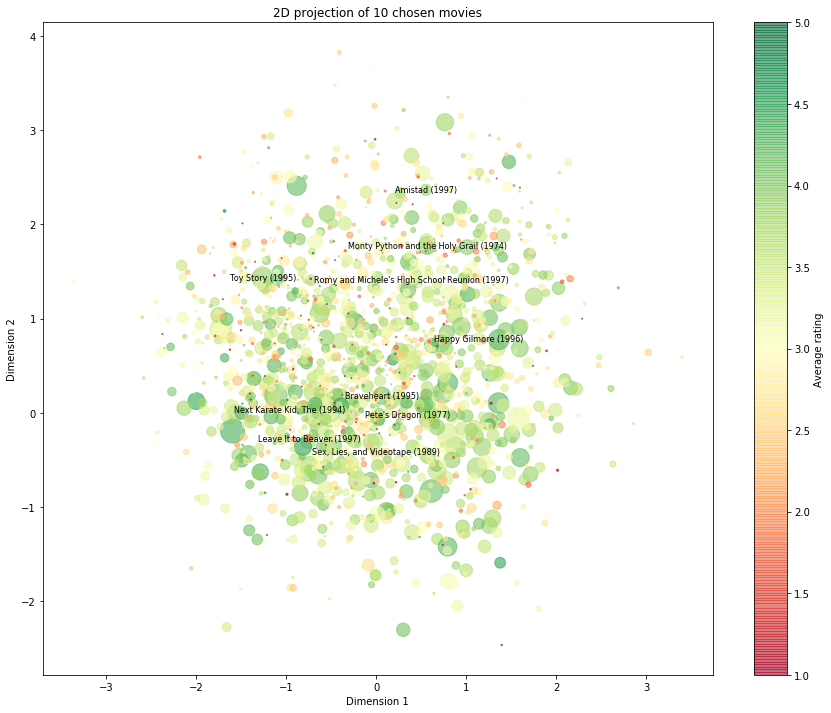

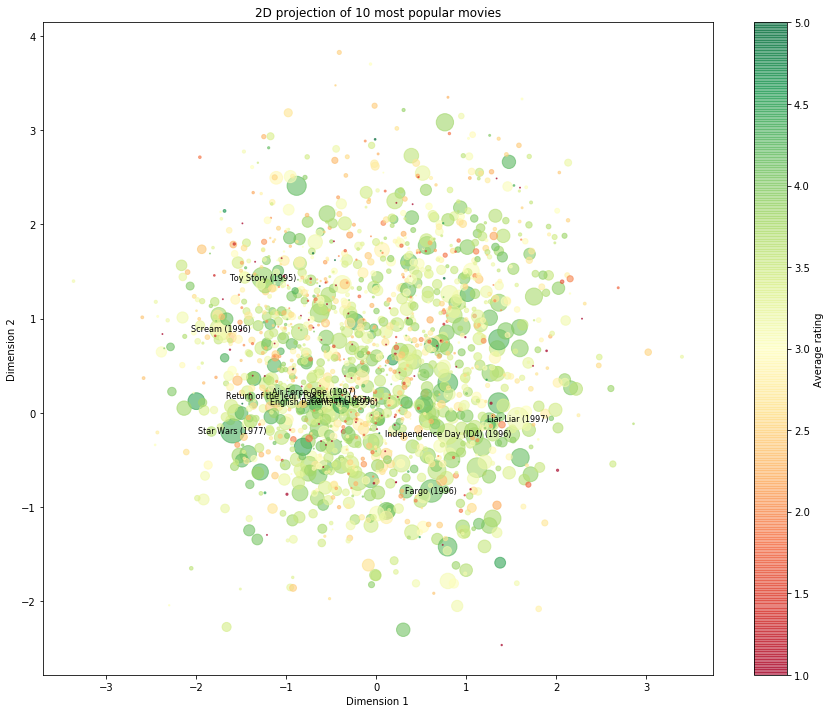

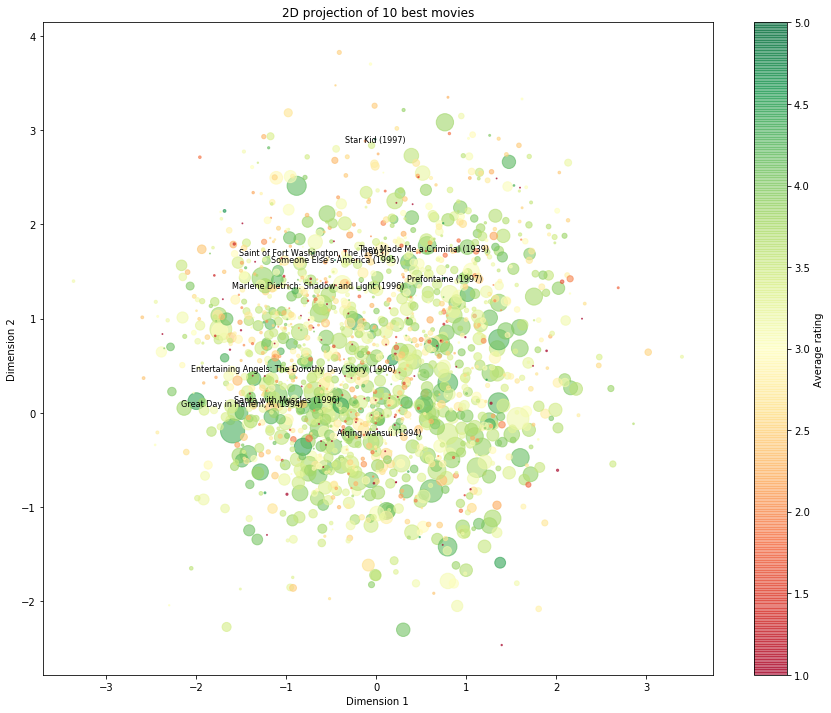

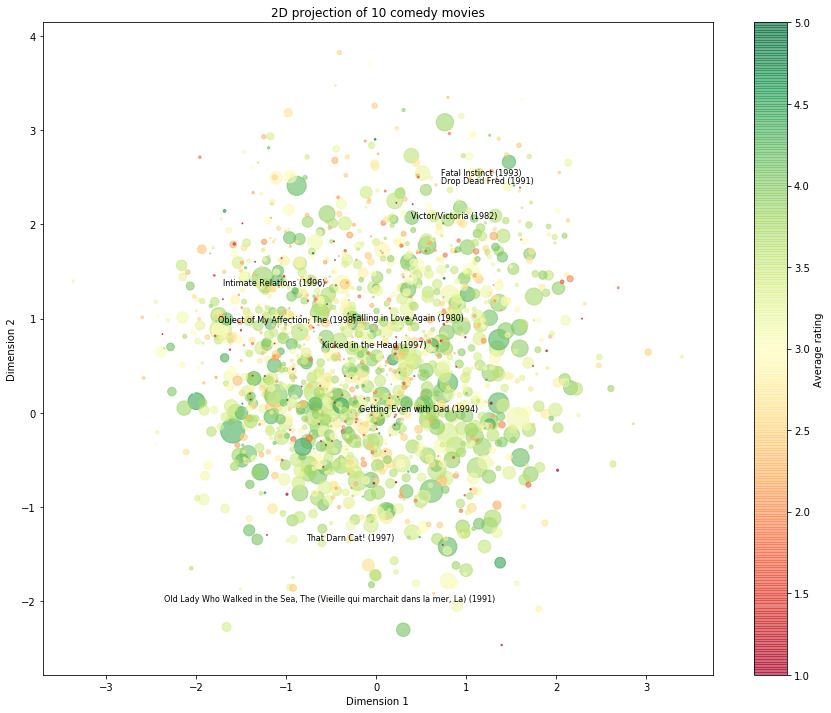

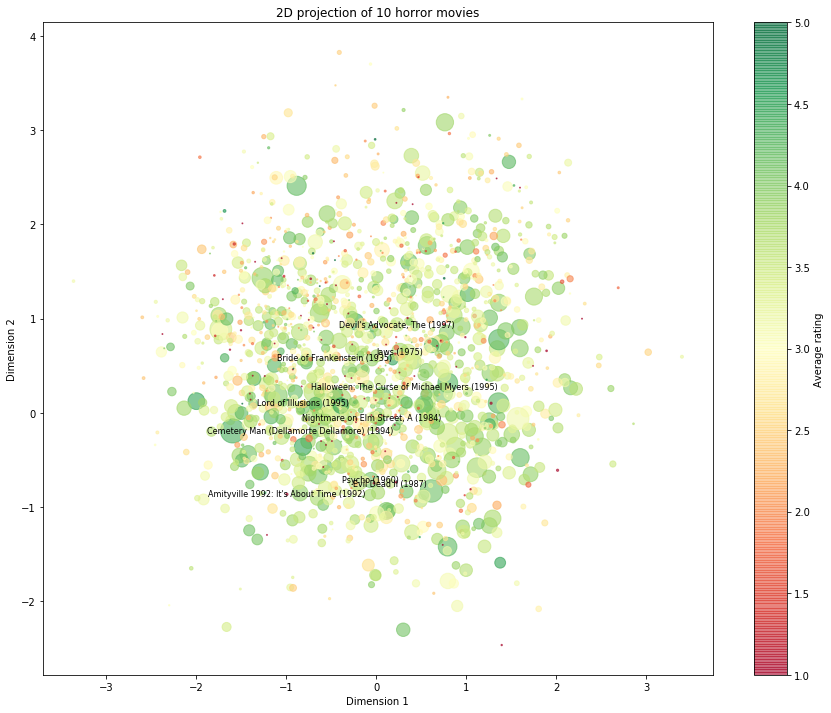

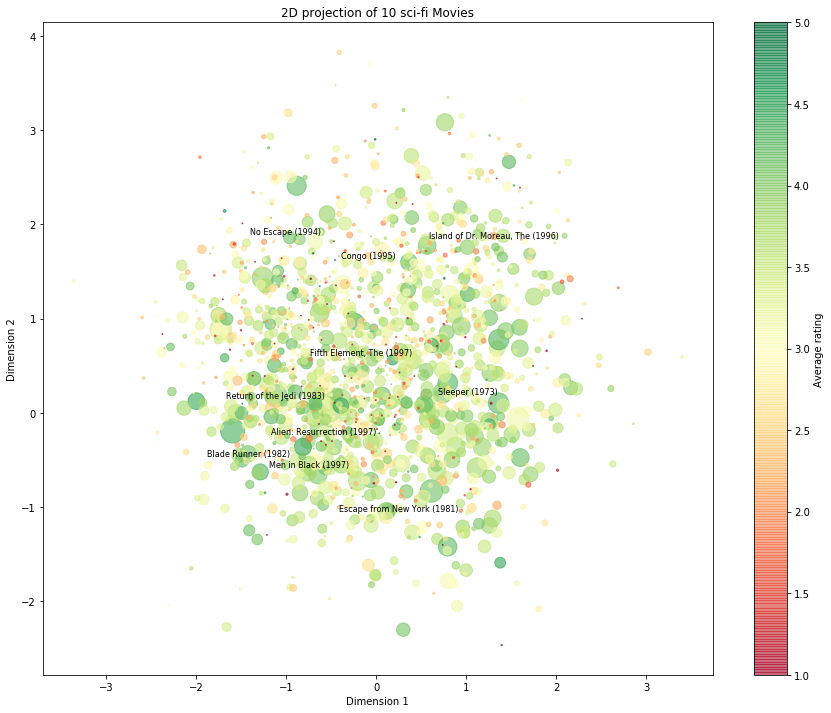

In [30]:
make_plot(chosen_idx, '2D projection of 10 chosen movies')
make_plot(popular_idx, '2D projection of 10 most popular movies')
make_plot(best_idx, '2D projection of 10 best movies')
make_plot(comedy_idx, '2D projection of 10 comedy movies')
make_plot(horror_idx, '2D projection of 10 horror movies')
make_plot(scifi_idx, '2D projection of 10 sci-fi Movies')